In [ ]:
from utils.create_antenna_for_scattering import ifa_gmsh
from utils.gmsh_function import *
from src.scattering_algorithm.scattering_algorithm import *
from efield.efield2 import radiation_intensity_distribution_over_sphere_surface
from efield.efield3 import antenna_directivity_pattern
import time

In [ ]:
def process_antenna(filename):
    base_name = os.path.splitext(os.path.basename(filename))[0]
    print(f"Processing antenna {base_name}")

In [ ]:
# Antenna parameters
Lenght = 20 / 1000    # Antenna width
Hight = 40 / 1000     # Antenna height
Small_Lenght = 1 / 1000  # Width of the "F" segment
Small_Hight = 10 / 1000  # Height of the "F" segment
gap_F = 10 / 1000
mesh_size = Small_Lenght * 10
print(f"Mesh size: {mesh_size}")
mesh_name = "ifa_gmsh.msh"
save_mesh_folder = 'data/gmsh_files/'

Mesh size: 0.01


In [4]:
ifa_msh_gmsh = ifa_gmsh(Lenght, Hight, Small_Lenght, Small_Hight, gap_F, mesh_name, save_mesh_folder, mesh_size)
open_mesh(ifa_msh_gmsh)

ifa_gmsh.msh saved in data/gmsh_files/ifa_gmsh.msh successfully


In [5]:
ifa_mat_gmsh = 'data/antennas_mesh/ifa_gmsh.mat'
extract_msh_to_mat(ifa_msh_gmsh, ifa_mat_gmsh)

In [6]:
wave_incident_direction = np.array([0, 0, -1])
polarization=np.array([0, 1, 0])

In [ ]:
process_antenna(ifa_mat_gmsh)
print("\n")

start_time = time.time()

scattering_algorithm(ifa_mat_gmsh, 1.3e9, wave_incident_direction, polarization)

elapsed_time = time.time() - start_time
print(f"\nElapsed time for processing the studied antenna: {elapsed_time:.6f} seconds")
print('\n')

Traitement de l'antenne ifa_gmsh


length of antenna ifa_gmsh = 0.02 meter
width of antenna ifa_gmsh = 0.05000000000000001 meter
height of antenna ifa_gmsh = 0.0 meter


Nombre d'elements de maillage (edges) = 48


Sauvegarde du fichier : ifa_gmsh_current.mat effectué avec succès !

Fréquence de l'onde incidente : 1300000000.0 Hz

ifa_gmsh antenna surface current in receiving mode view is successfully created at frequency 1300000000.0 Hz



Temps écoulé pour le traitement de l'antenne étudiée : 0.417928 secondes




Calculating radiation intensity distribution over sphere surface...

Frequency = 1300000000.0 Hz
Longueur d'onde lambda = 0.23057873383123786 m

Total Power :  0.000000
Gain Linear :  1.491781
Gain Logarithmic :  1.737050 dB
Data saved successfully to data/antennas_gain_power/ifa_gmsh_gain_power.mat


Generating antenna directivity pattern...
Data loaded from data/antennas_gain_power/ifa_gmsh_gain_power.mat


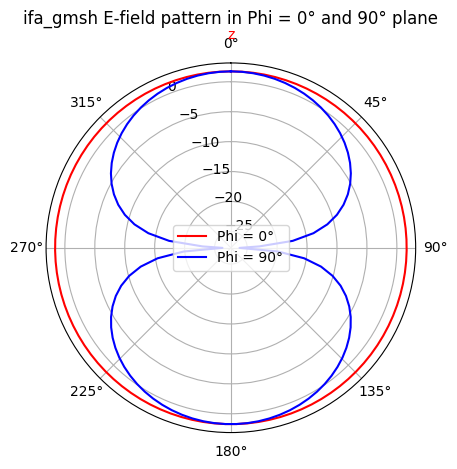

In [ ]:
ifa_mesh2 = 'data/antennas_mesh2/ifa_gmsh_mesh2.mat'
ifa_current = 'data/antennas_current/ifa_gmsh_current.mat'
ifa_gain_power = 'data/antennas_gain_power/ifa_gmsh_gain_power.mat'
filename_sphere_dense = '../../data/sphere_mesh/sphere_dense.mat'

# Step 2: Radiation intensity distribution over a sphere
print("Calculating radiation intensity distribution over sphere surface...")
radiation_intensity_distribution_over_sphere_surface(ifa_mesh2, ifa_current, filename_sphere_dense, scattering=True)

# Step 3: Generation of the directivity pattern
print("Generating antenna directivity pattern...")
antenna_directivity_pattern(ifa_mesh2, ifa_current, ifa_gain_power, scattering=True)